## Working with the DataBase: VENPAYBI

### The Table dbo.CoffeeCappTransByMerchantInstantKpis

In [1]:
import os
import sys
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

sys.path.insert(1, r'C:\Users\AdebanjiAdelowo\OneDrive - N-and Group Ltd\Documents\N-ANDITALIA\Private')
import securitydetail

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [3]:
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server =  securitydetail.server
database =  securitydetail.database 
username = securitydetail.username
password = securitydetail.password    

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [4]:

sql = "SELECT  * FROM CoffeeCappTransByMerchantInstantKpis"

df_coffee1 = pd.read_sql(sql, engine)
df_coffee1

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:55:00,1,Vending Company,0,0,0,0,0,0
1,2,2022-11-30 13:55:00,2,BiTX,0,0,0,0,0,0
2,3,2022-11-30 13:55:00,4,Vaportris,0,0,0,0,0,0
3,4,2022-11-30 13:55:00,6,EOS Srl,0,0,0,0,0,0
4,5,2022-11-30 13:55:00,7,Your Best Break,1089,915,50,98,26,0
...,...,...,...,...,...,...,...,...,...,...
6360394,6370314,2023-10-12 08:30:00,123,CASALE ESPRESSO OCS,0,0,0,0,0,0
6360395,6370315,2023-10-12 08:30:00,124,MOKAMATIC,0,0,0,0,0,0
6360396,6370316,2023-10-12 08:30:00,125,COFFEE TIME SRL,0,0,0,0,0,0
6360397,6370317,2023-10-12 08:30:00,126,Gr Generale Ristorazione Srl,0,0,0,0,0,0


In [5]:
df_coffee1.where(df_coffee1['SystemErrorsCounter'] != 0).dropna()

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
76036,76037.0,2022-12-05 11:15:00,7.0,Your Best Break,515.0,367.0,49.0,41.0,14.0,44.0
76037,76038.0,2022-12-05 11:15:00,8.0,Gesa S.p.A.,0.0,0.0,0.0,0.0,0.0,44.0
76038,76039.0,2022-12-05 11:15:00,10.0,Aesse Service Srl,0.0,0.0,0.0,0.0,0.0,44.0
76039,76040.0,2022-12-05 11:15:00,12.0,Automatic Service,0.0,0.0,0.0,0.0,0.0,44.0
76040,76041.0,2022-12-05 11:15:00,14.0,Serim,0.0,0.0,0.0,0.0,0.0,44.0
...,...,...,...,...,...,...,...,...,...,...
6219305,6229225.0,2023-10-06 21:55:00,121.0,SARL CRISTAL,0.0,0.0,0.0,0.0,0.0,8.0
6219306,6229226.0,2023-10-06 21:55:00,122.0,COFFING SERVICES,0.0,0.0,0.0,0.0,0.0,8.0
6219307,6229227.0,2023-10-06 21:55:00,123.0,CASALE ESPRESSO OCS,0.0,0.0,0.0,0.0,0.0,8.0
6219308,6229228.0,2023-10-06 21:55:00,124.0,MOKAMATIC,0.0,0.0,0.0,0.0,0.0,8.0


In [6]:
df_coffee1.columns

Index(['PK_CoffeeCappTransByMerchantInstantKpisId', 'ReferenceDate',
       'EK_MerchantId', 'MerchantName', 'TotalTransactionsCounter',
       'CompletedTransactionsCounter', 'ValidationErrorsCounter',
       'ConnectionErrorsCounter', 'RejectionErrorsCounter',
       'SystemErrorsCounter'],
      dtype='object')

In [7]:
# drop all categorical features

cat_features= ["PK_CoffeeCappTransByMerchantInstantKpisId", "ReferenceDate", "EK_MerchantId", "MerchantName"]
df_coffee_cont_feat = df_coffee1.drop(cat_features, axis=1)
df_coffee_cont_feat

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1089,915,50,98,26,0
...,...,...,...,...,...,...
6360394,0,0,0,0,0,0
6360395,0,0,0,0,0,0
6360396,0,0,0,0,0,0
6360397,0,0,0,0,0,0


### Explore the continous variables 

In [8]:
df_coffee_cont_feat.describe()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
count,6.360399e+06,6.360399e+06,6.360399e+06,6.360399e+06,6.360399e+06,6.360399e+06
mean,9.275382e+00,7.440953e+00,3.739335e-01,1.035174e+00,4.222652e-01,4.886659e-02
std,9.642240e+01,7.691589e+01,6.266151e+00,1.234883e+01,4.968272e+00,1.219630e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.034000e+03,4.338000e+03,1.373000e+03,2.225000e+03,4.960000e+02,4.386000e+03


In [9]:
cat_features= ["PK_CoffeeCappTransByMerchantInstantKpisId", "ReferenceDate", "EK_MerchantId"]
df_coffee1.drop(cat_features, axis=1, inplace=True)
df_coffee1

,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,Vending Company,0,0,0,0,0,0
1,BiTX,0,0,0,0,0,0
2,Vaportris,0,0,0,0,0,0
3,EOS Srl,0,0,0,0,0,0
4,Your Best Break,1089,915,50,98,26,0
...,...,...,...,...,...,...,...
6360394,CASALE ESPRESSO OCS,0,0,0,0,0,0
6360395,MOKAMATIC,0,0,0,0,0,0
6360396,COFFEE TIME SRL,0,0,0,0,0,0
6360397,Gr Generale Ristorazione Srl,0,0,0,0,0,0


In [10]:
df_coffee1.groupby('MerchantName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
MerchantName,,,,,,
ALFA ESPRESS SNC DI METALLI MARIO E C.,0.000000,0.000000,0.000000,0.000000,0.000000,0.005364
Accenture,0.000000,0.000000,0.000000,0.000000,0.000000,0.174965
Ada Vending Srl,0.001174,0.000930,0.000000,0.000000,0.000245,0.007732
Aesse Service Srl,0.000000,0.000000,0.000000,0.000000,0.000000,0.175471
Agrupación Empresas Vending s.l,0.001764,0.001764,0.000000,0.000000,0.000000,0.002646
...,...,...,...,...,...,...
Vending Service,0.000000,0.000000,0.000000,0.000000,0.000000,0.003761
Vendomat,0.007323,0.006444,0.000011,0.000495,0.000374,0.174965
Venpay S.p.A.,0.000000,0.000000,0.000000,0.000000,0.000000,0.003805


In [11]:
df_coffee1.groupby(df_coffee1['TotalTransactionsCounter']!=0).mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
TotalTransactionsCounter,,,,,,
False,0.000000,0.000000,0.000000,0.000000,0.000000,0.051446
True,77.712085,62.342658,3.132933,8.673015,3.537871,0.029832


In [12]:
df_nonzerotrans = df_coffee1.where(df_coffee1['TotalTransactionsCounter']!=0).dropna()
df_nonzerotrans.groupby('MerchantName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
MerchantName,,,,,,
Ada Vending Srl,1.500000,1.187500,0.000000,0.000000,0.312500,0.000000
Agrupación Empresas Vending s.l,1.666667,1.666667,0.000000,0.000000,0.000000,0.000000
Cesena Vending,1.463226,1.222211,0.027372,0.186586,0.026954,0.007626
Ciesse Caffe,4.809423,4.116275,0.146212,0.473944,0.072246,0.005956
DC - DISTRIBUTEURS AUTOMATIQUES REC. LDA,1.884615,1.153846,0.000000,0.500000,0.230769,0.000000
Daba Snc,1.648145,1.123281,0.116406,0.389351,0.018948,0.006956
EOS Srl,1.804769,1.483117,0.081373,0.212594,0.027684,0.002720
Elleti Distribuzione,4.855971,4.046922,0.132961,0.587640,0.087106,0.006067
Espressomat,1.395904,1.088737,0.047782,0.242321,0.017065,0.010239


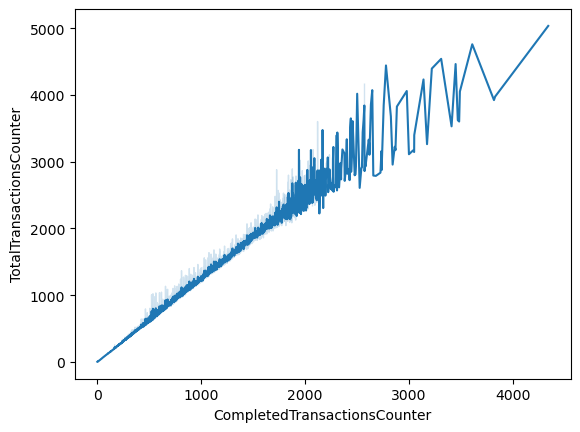

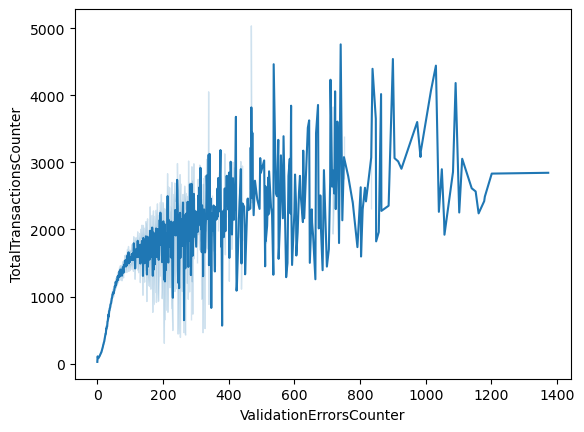

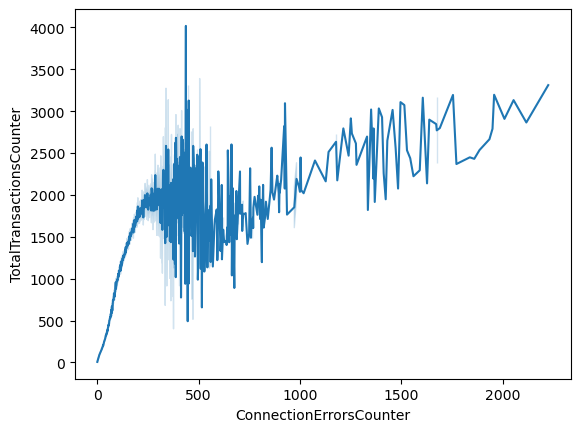

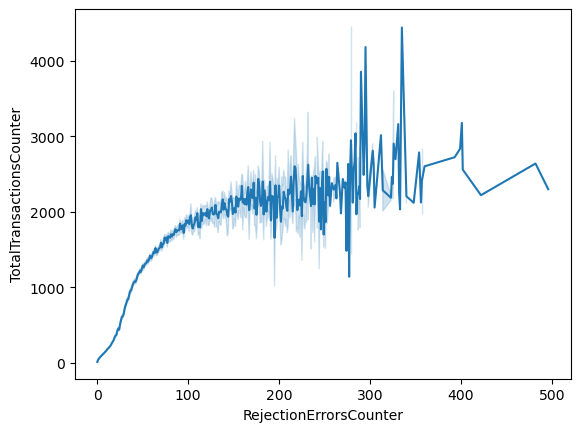

In [13]:
for i, col in enumerate(['CompletedTransactionsCounter', 'ValidationErrorsCounter', 'ConnectionErrorsCounter', 'RejectionErrorsCounter']):
    plt.figure(i)
    sns.lineplot(x=col, y='TotalTransactionsCounter', data=df_nonzerotrans)

In [14]:
#df_nonzerotrans.pivot_table(index='MerchantName', columns=, aggfunc= )

### Split into train, validation and test set

In [15]:
features = df_nonzerotrans.drop(['MerchantName','TotalTransactionsCounter'], axis=1)
target = df_nonzerotrans['TotalTransactionsCounter']

In [16]:
features.head()

,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
4,915.0,50.0,98.0,26.0,0.0
11,24.0,0.0,5.0,2.0,0.0
22,25.0,7.0,5.0,0.0,0.0
23,68.0,4.0,7.0,2.0,0.0
25,48.0,12.0,3.0,12.0,0.0


In [17]:
target.head()

4     1089.0
11      31.0
22      37.0
23      81.0
25      75.0
Name: TotalTransactionsCounter, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
print(len(target), len(y_train), len(y_val), len(y_test))

759150 455490 151830 151830


### Linear Regression Model

In [20]:
model = LinearRegression()

In [21]:
scores = cross_val_score(model, features, target.values.ravel(), cv=5)

In [22]:
scores

array([0.99999945, 0.99999966, 0.99992809, 0.99999948, 0.99999913])

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_predict = model.predict(X_test)

In [25]:
mean_squared_error(y_test, y_predict)

0.02912396557562182

##### The total number of Coffee Transactions for each Merchant is displayed below

In [26]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
        ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,46911163,37358312
1,Sogedai,4809312,3974628
2,Ivs Iberica,3628174,3061439
3,Ivs France,1332464,1098990
4,Liomatic,728379,533142
...,...,...,...
87,BIANCHI INDUSTRY,0,0
88,TUTTOMATIC,0,0
89,COFFING SERVICES,0,0
90,PANATTA,0,0


In [27]:
query = """
SELECT MerchantName, TotalTrans, TotalCompTrans FROM 
        (
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        WHERE TotalTransactionsCounter != 0
        GROUP BY MerchantName ) T1
WHERE T1.TotalTrans > 200000
ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,46911163,37358312
1,Sogedai,4809312,3974628
2,Ivs Iberica,3628174,3061439
3,Ivs France,1332464,1098990
4,Liomatic,728379,533142
5,ProntoCoffee,546875,446572
6,Ciesse Caffe,271355,232249


<Axes: xlabel='MerchantName'>

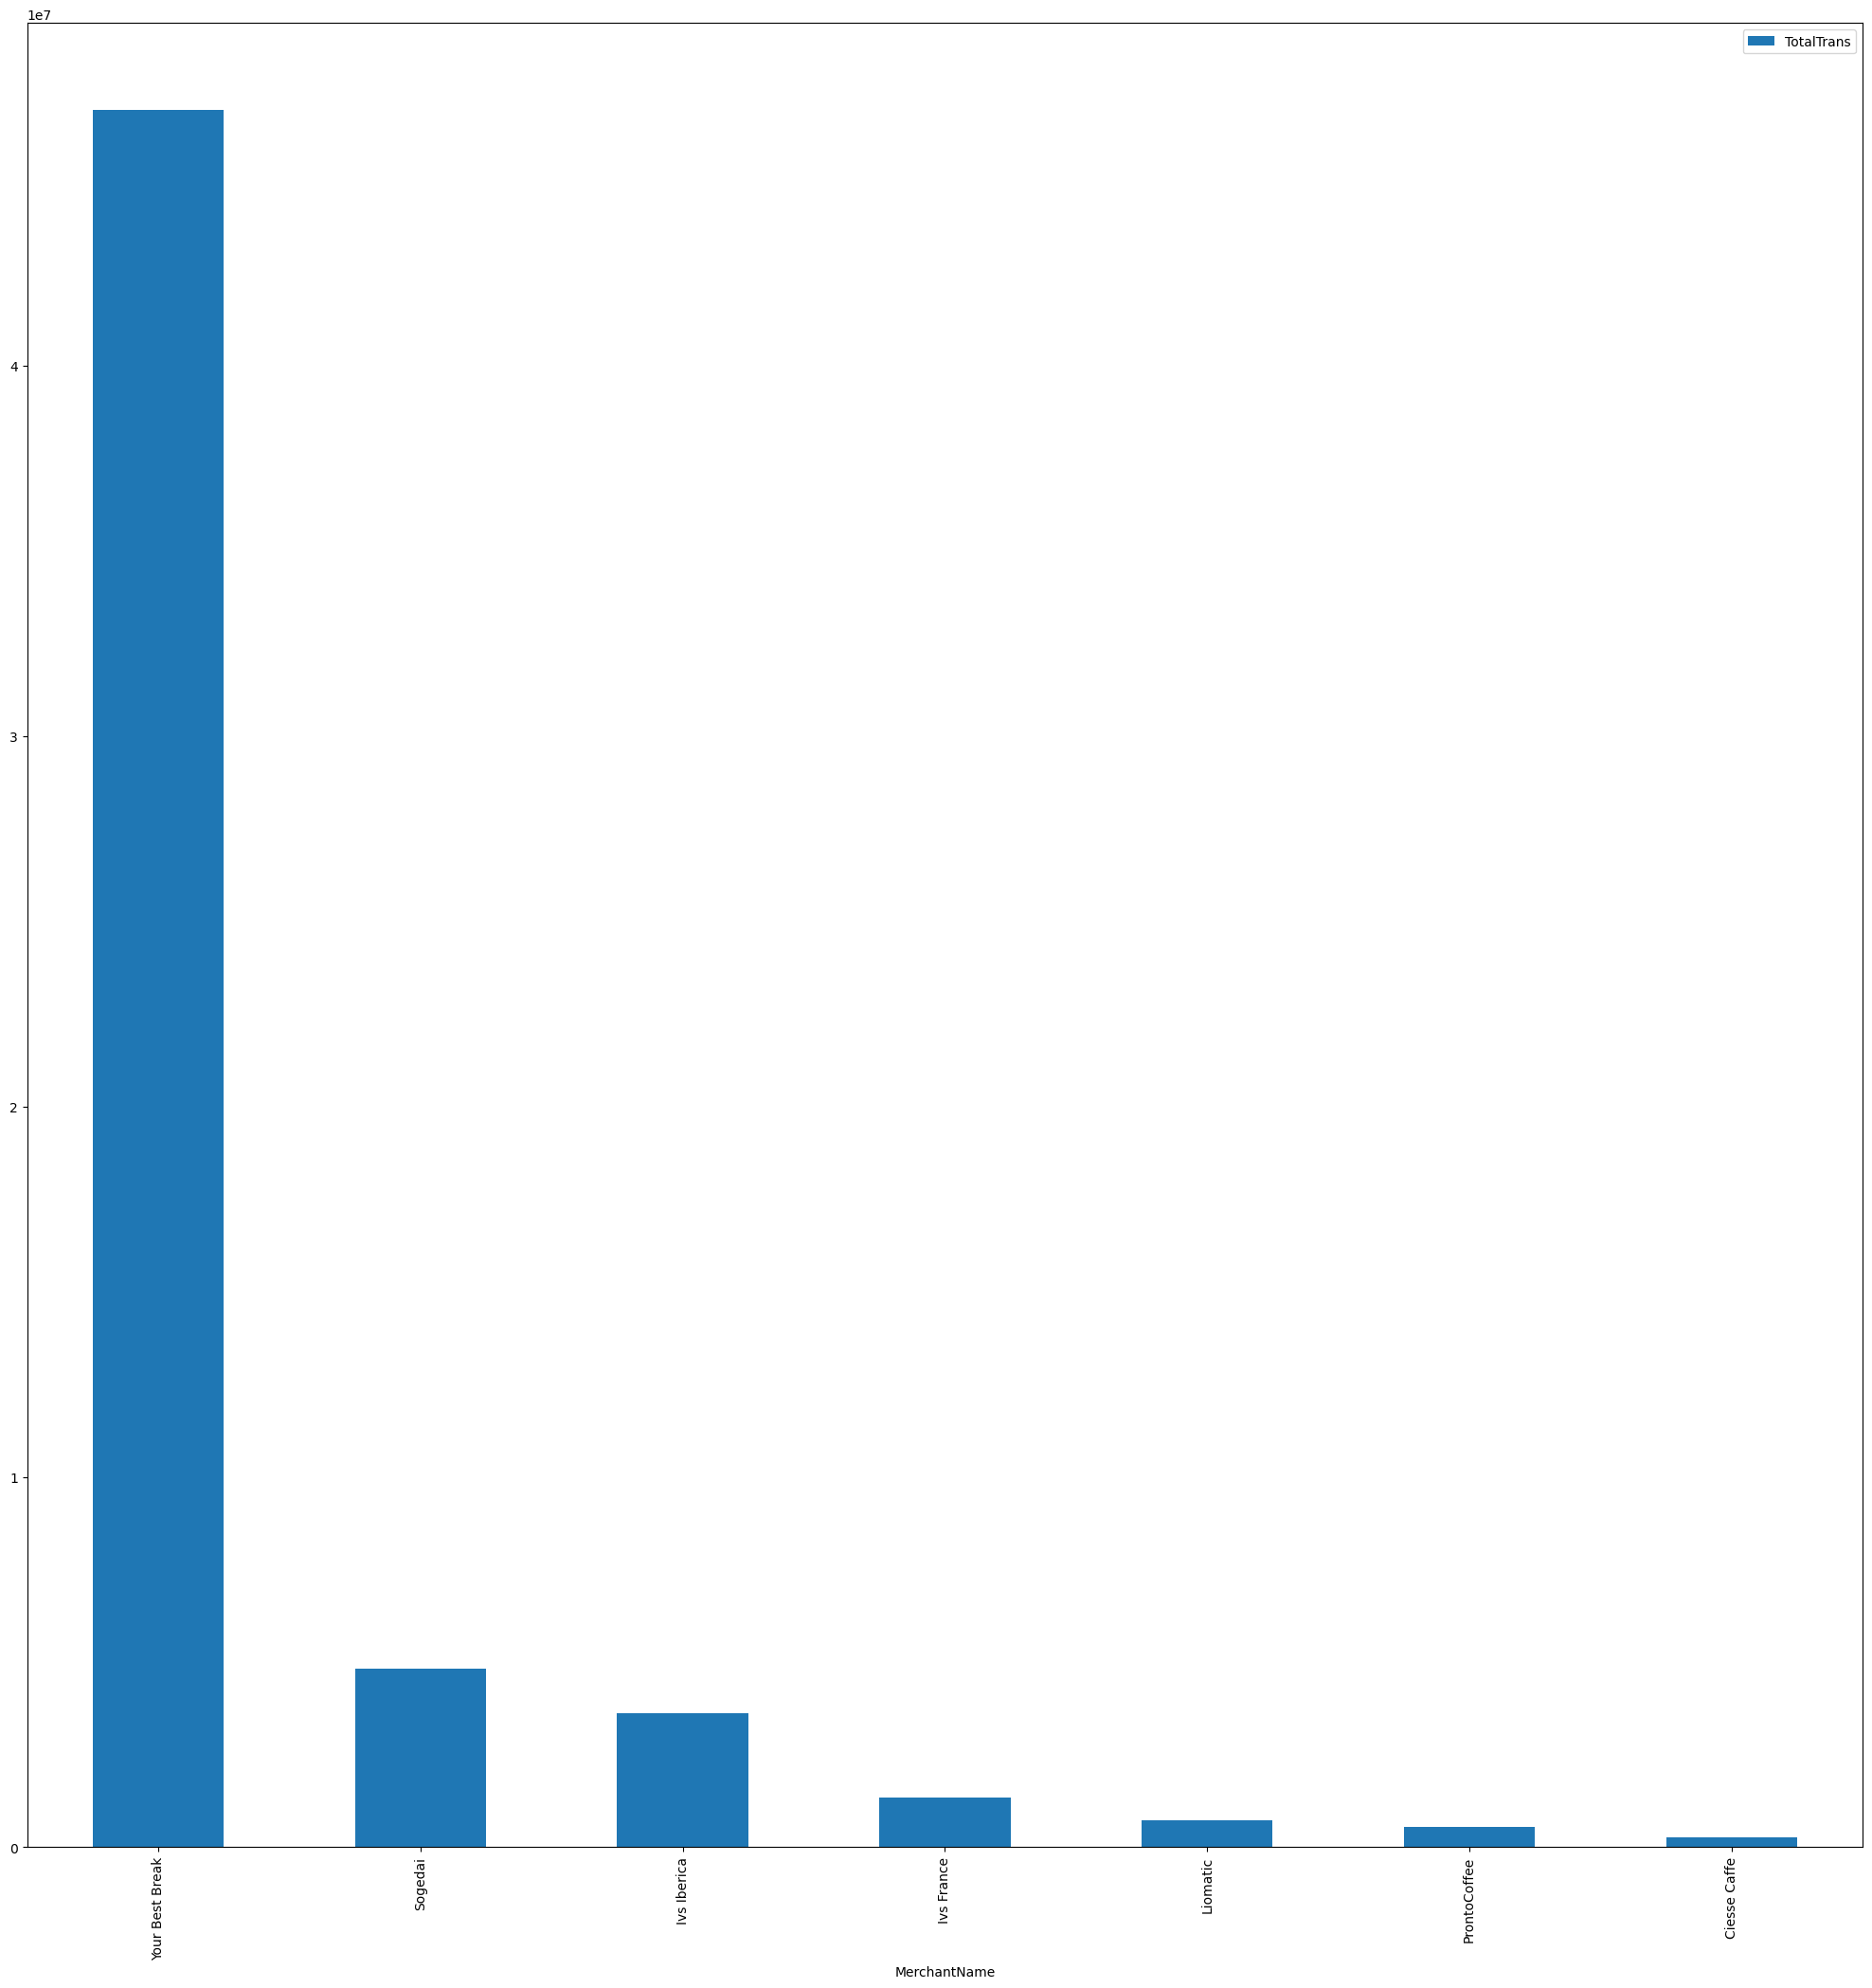

In [28]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalTrans",
  figsize=(25, 25)
  )

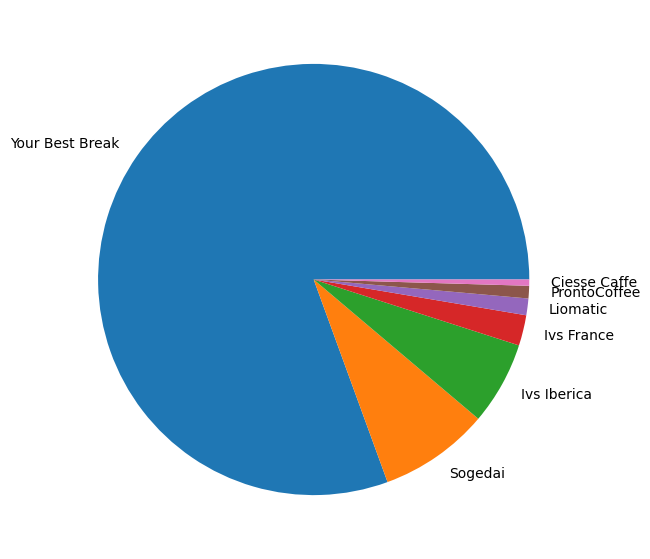

In [29]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_coffee3['TotalTrans'], labels = df_coffee3['MerchantName'])
 
# show plot
plt.show()

<Axes: xlabel='MerchantName'>

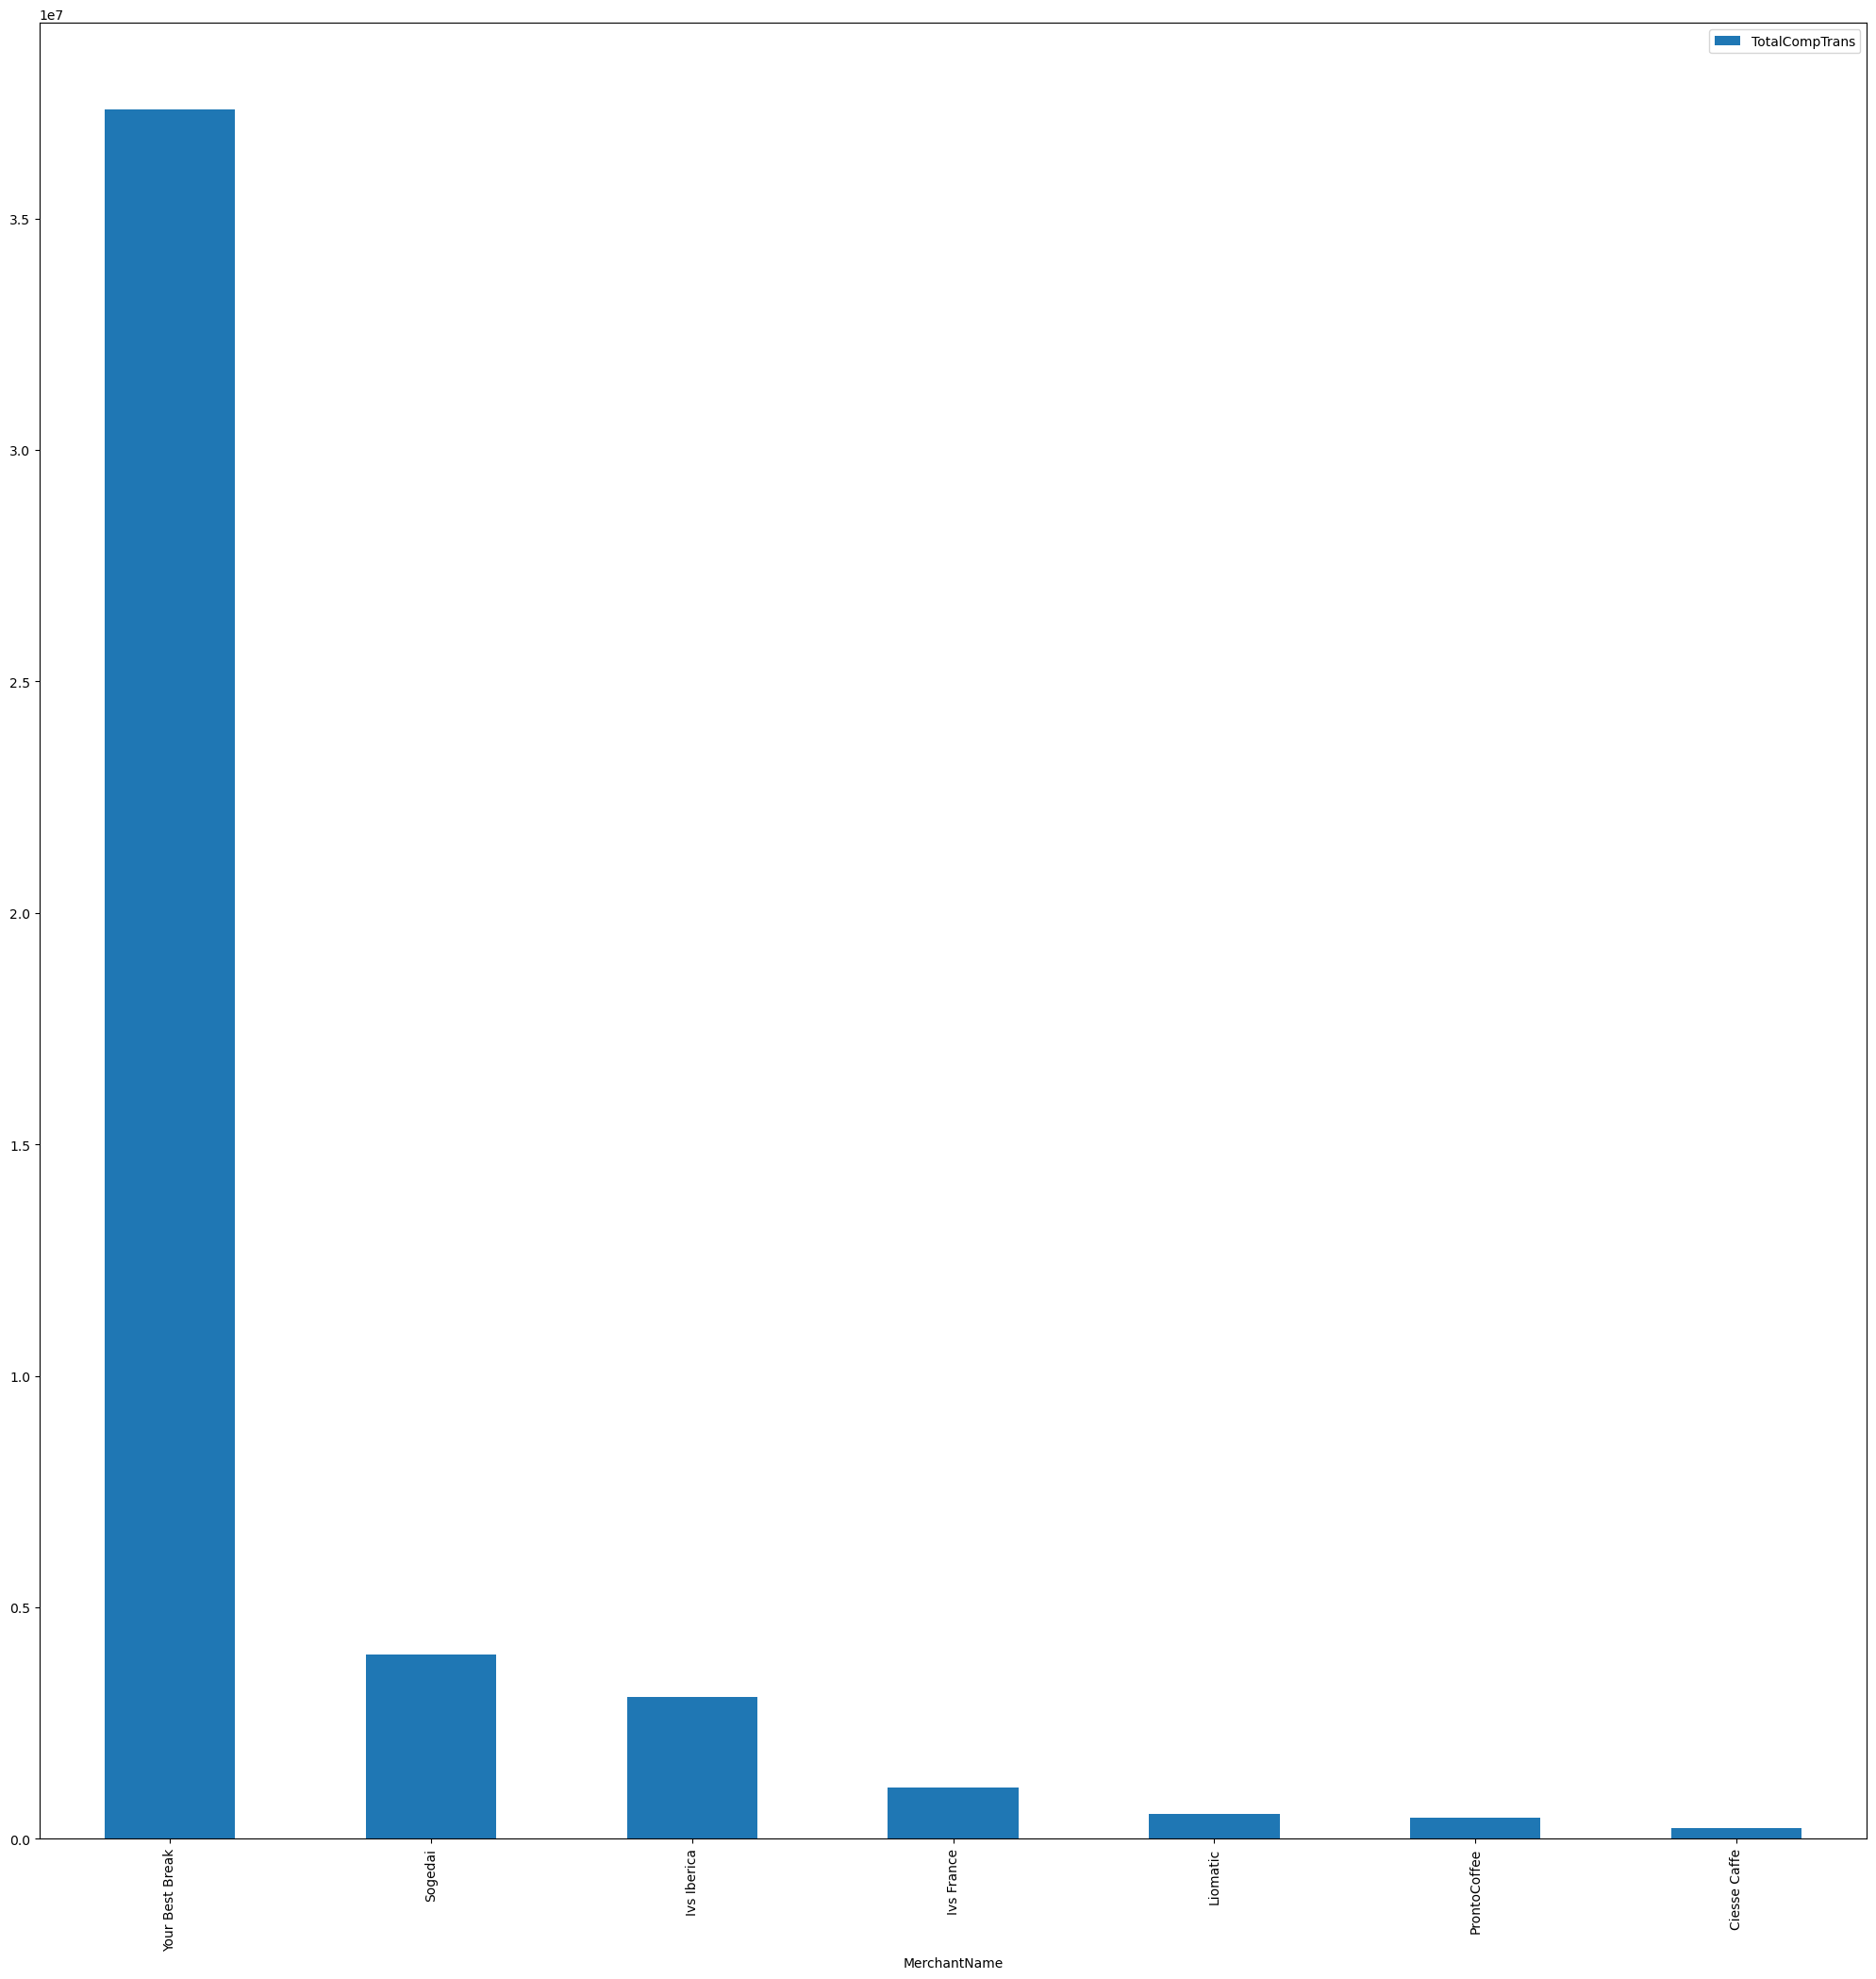

: 

In [30]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalCompTrans",
  figsize=(25, 25)
  )